### Loading Dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Importing Dependencies

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
with_mask_files= os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels

with mask -> 1

without mask -> 0

In [10]:
with_labels = [1] * 3725
without_labels = [0] * 3828
labels = with_labels + without_labels

In [12]:
len(labels)

7553

### Image Samples



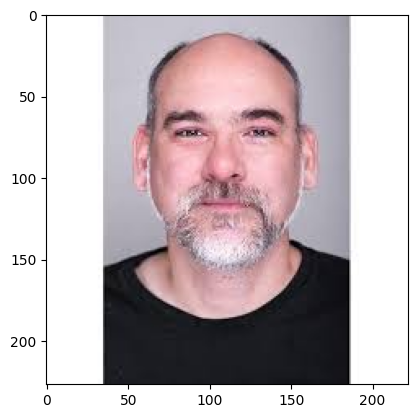

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_1019.jpg')
imgplot = plt.imshow(img)
plt.show()

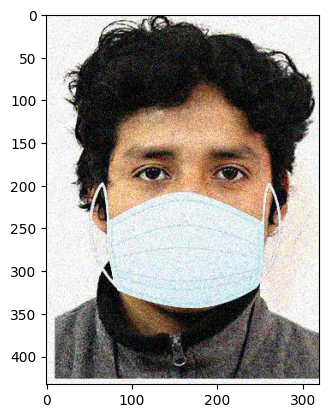

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_1894.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image Preprocessing

In [34]:
with_mask_path = '/content/data/with_mask/'
data =[]
for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [35]:
len(data)

7553

In [36]:
data[0].shape

(128, 128, 3)

In [37]:
x= np.array(data)
y= np.array(labels)

In [38]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


### Train Test Split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [40]:
x_train.shape

(6042, 128, 128, 3)

In [41]:
y_train.shape

(6042,)

In [42]:
x_train_scaled = x_train/ 255
x_test_scaled = x_test/255

### Model Architecture

In [51]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [53]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(x_train_scaled,y_train, validation_split=0.2, epochs = 5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6925 - loss: 0.6975 - val_accuracy: 0.8958 - val_loss: 0.3710
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8283 - loss: 0.4024 - val_accuracy: 0.8974 - val_loss: 0.2793
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8953 - loss: 0.2697 - val_accuracy: 0.9148 - val_loss: 0.2356
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9053 - loss: 0.2445 - val_accuracy: 0.9264 - val_loss: 0.2169
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9226 - loss: 0.1958 - val_accuracy: 0.9032 - val_loss: 0.2871


### Evaluation

In [48]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8512 - loss: 0.5183
Test Accuracy = 0.8444738388061523


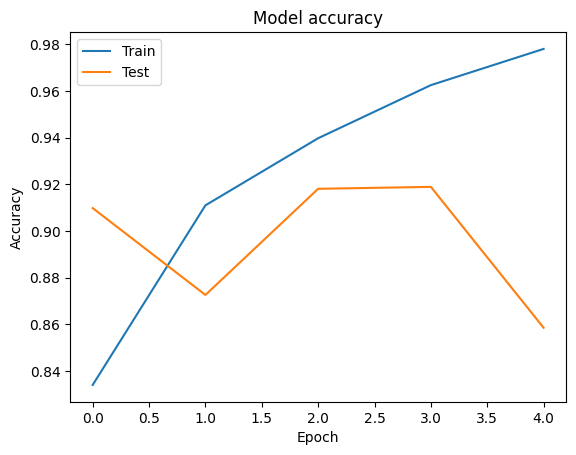

In [49]:
# Plot training & validation accuracy values
#before optimization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

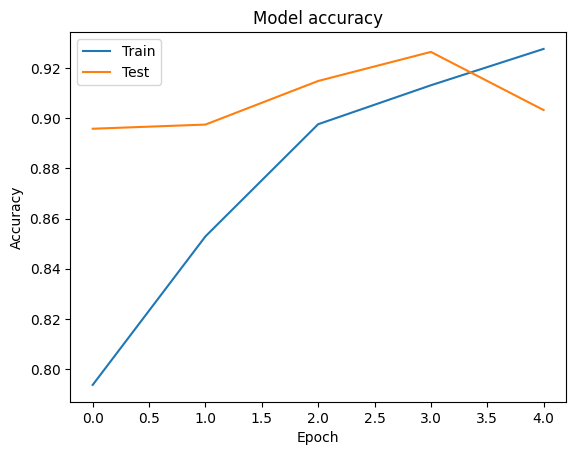

In [55]:
# Plot training & validation accuracy values
#after optimization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

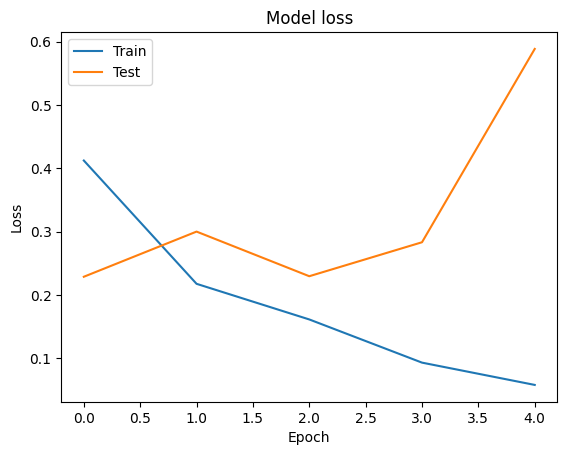

In [50]:
# Plot training & validation loss values
#before optmization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

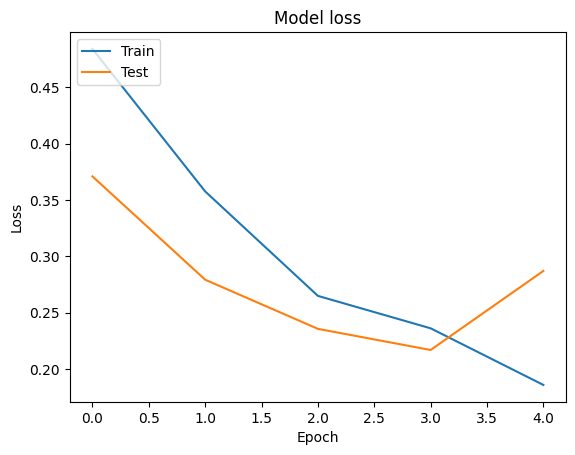

In [56]:
# Plot training & validation loss values
#after optmization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()